# LSTM

Notebook to look at forecasts made using LSTM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

warnings.filterwarnings('ignore')

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_54871/3247864242.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from LSTM import backtest

In [3]:
ds_begin = datetime(2022, 7, 1)
ds_end = datetime(2024, 12, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

## Predictions when removing the seasonality

In [4]:
error = pd.read_csv('LSTM/errors_sa.csv')
print(error)

    Unnamed: 0  hidden_units  num_layers  sequence_lengths       MSE  \
0            0            10           1                12  0.000015   
1            0            10           1                18  0.000014   
2            0            10           1                24  0.000017   
3            0            10           2                12  0.000015   
4            0            10           2                18  0.000014   
5            0            10           2                24  0.000016   
6            0            10           3                12  0.000016   
7            0            10           3                18  0.000013   
8            0            10           3                24  0.000017   
9            0            12           1                12  0.000014   
10           0            12           1                18  0.000013   
11           0            12           1                24  0.000014   
12           0            12           2                12  0.00

We get the best results for hidden_units = 12, num_layers = 2 and sequence_length = 12. Let us plot the predictions.

In [5]:
features = ['Metro_sales_count_now_uc_sfrcondo_month',
            'Metro_invt_fs_uc_sfrcondo_month',
            'Metro_new_listings_uc_sfrcondo_month',
            'Metro_mean_doz_pending_uc_sfrcondo_month',
            'Metro_mean_sale_to_list_uc_sfrcondo_month',
            'Metro_med_doz_pending_uc_sfrcondo_month',
            'Metro_median_sale_to_list_uc_sfrcondo_month',
            'Metro_new_pending_uc_sfrcondo_month',
            'Metro_perc_listings_price_cut_uc_sfrcondo_month',
            'Metro_pct_sold_above_list_uc_sfrcondo_month',
            'Metro_pct_sold_below_list_uc_sfrcondo_month']

In [6]:
batch_size = 4
learning_rate = 5e-4
n_epochs = 100
(y, y_hat) = backtest(features, 12, 2, 12, \
    batch_size, learning_rate, n_epochs, ds_begin, ds_end, 48, True)

In [7]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


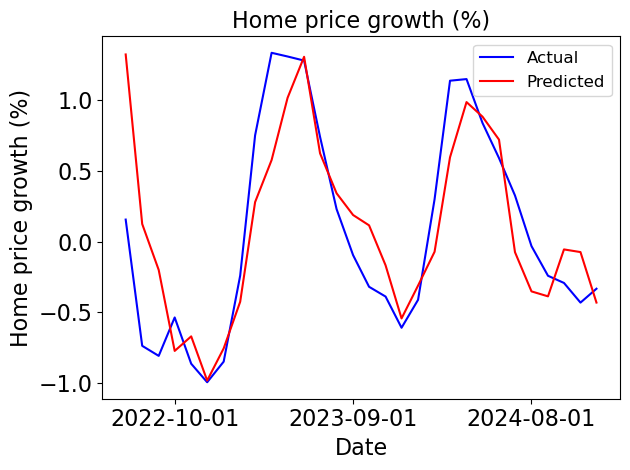

In [8]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/LSTM_sa.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [9]:
error = pd.read_csv('LSTM/errors_nsa.csv')
print(error)

    Unnamed: 0  hidden_units  num_layers  sequence_lengths       MSE  \
0            0            10           1                12  0.000017   
1            0            10           1                18  0.000019   
2            0            10           1                24  0.000019   
3            0            10           2                12  0.000017   
4            0            10           2                18  0.000017   
5            0            10           2                24  0.000018   
6            0            10           3                12  0.000016   
7            0            10           3                18  0.000017   
8            0            10           3                24  0.000019   
9            0            12           1                12  0.000015   
10           0            12           1                18  0.000015   
11           0            12           1                24  0.000015   
12           0            12           2                12  0.00

We get the best results for hidden_units = 14, num_layers = 2 and sequence_length = 18. Let us plot the predictions.

In [10]:
features = ['Metro_sales_count_now_uc_sfrcondo_month',
                'Metro_invt_fs_uc_sfrcondo_month',
                'Metro_new_listings_uc_sfrcondo_month',
                'Metro_mean_doz_pending_uc_sfrcondo_month',
                'Metro_mean_sale_to_list_uc_sfrcondo_month',
                'Metro_med_doz_pending_uc_sfrcondo_month',
                'Metro_median_sale_to_list_uc_sfrcondo_month',
                'Metro_new_pending_uc_sfrcondo_month',
                'Metro_perc_listings_price_cut_uc_sfrcondo_month',
                'Metro_pct_sold_above_list_uc_sfrcondo_month',
                'Metro_pct_sold_below_list_uc_sfrcondo_month']

In [11]:
batch_size = 4
learning_rate = 5e-4
n_epochs = 100
(y, y_hat) = backtest(features, 14, 2, 18, \
    batch_size, learning_rate, n_epochs, ds_begin, ds_end, 48, False)

In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


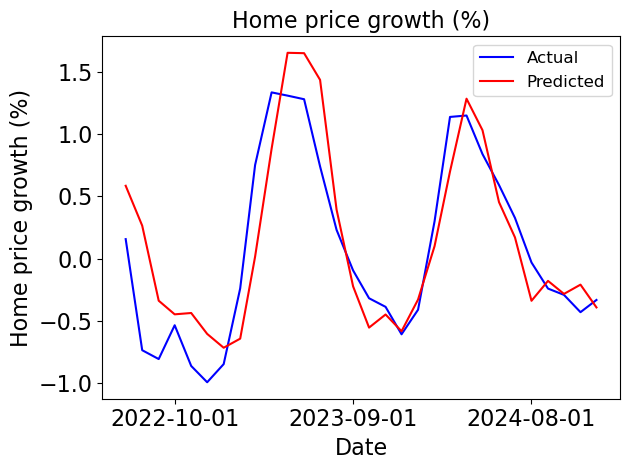

In [13]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/LSTM.eps', format='eps')
plt.show()